## Business Understanding (10 points total).  

• Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?). Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? How would you measure the effectiveness of a
good prediction algorithm? Be specific.

This dataset was 
Abstract: This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).
	

***  
Citation Request:
***  
K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.
***  


## Data Understanding (80 points total)  

### Group 1
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.  

• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.  

• [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you
found something interesting. Note: You can also use data from other sources for
comparison. Explain the significance of the statistics run and why they are meaningful.  

### Group 2
• [15 points] Visualize the most important attributes appropriately (at least 5 attributes).
Important: Provide an interpretation for each chart. Explain for each attribute why the
chosen visualization is appropriate.  

### Group 3
• [15 points] Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.  

### Group 4
• [10 points] Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).  

• [5 points] Are there other features that could be added to the data or created from
existing features?  Which ones?  

### Group - All
Exceptional Work (10 points total)  
• You have free reign to provide additional analyses.  
• One idea: implement dimensionality reduction, then visualize and interpret the results.  



In [139]:
import pandas as pd
import numpy as np
import copy


df1 = pd.read_csv('data/OnlineNewsPopularity.csv') 

df1.columns = df1.columns.str.strip()
col_names = df1.columns.values.tolist()


# df1.corr()

#### Create categorical feature of day_of_week from the 7 booleans

In [140]:

df1['day_of_week'] = 'Mon'

tuesday = df1['weekday_is_tuesday'] == 1
df1.loc[tuesday, 'day_of_week'] = 'Tue'

wednesday = df1['weekday_is_wednesday'] == 1
df1.loc[wednesday, 'day_of_week'] = 'Wed'

thursday = df1['weekday_is_thursday'] == 1
df1.loc[thursday, 'day_of_week'] = 'Thu'

friday = df1['weekday_is_friday'] == 1
df1.loc[friday, 'day_of_week'] = 'Fri'

saturday = df1['weekday_is_saturday'] == 1
df1.loc[saturday, 'day_of_week'] = 'Sat'

sunday = df1['weekday_is_sunday'] == 1
df1.loc[sunday, 'day_of_week'] = 'Sun'

In [141]:

df1['data_channel'] = 'Lifestyle'

condition = df1['data_channel_is_entertainment'] == 1
df1.loc[condition, 'data_channel'] = 'Entertainment'

condition = df1['data_channel_is_bus'] == 1
df1.loc[condition, 'data_channel'] = 'Business'

condition = df1['data_channel_is_socmed'] == 1
df1.loc[condition, 'data_channel'] = 'SocMed'

condition = df1['data_channel_is_tech'] == 1
df1.loc[condition, 'data_channel'] = 'Tech'

condition = df1['data_channel_is_world'] == 1
df1.loc[condition, 'data_channel'] = 'World'


df1.iloc[:,61:].head(20)

,day_of_week,data_channel
0,Mon,Entertainment
1,Mon,Business
2,Mon,Business
3,Mon,Entertainment
4,Mon,Tech
5,Mon,Tech
6,Mon,Lifestyle
7,Mon,Tech
8,Mon,Tech
9,Mon,World


In [142]:
import datetime as dt


# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... parse url into useable elements, using str.split
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df1['http'], df1['blank'], df1['mash'], df1['year'],         \
    df1['month'], df1['day'], df1['title'], df1['extra']     \
    = df1['url'].str.split("\/", 7).str
    
df1.drop('http',  axis=1, inplace=True)
df1.drop('blank', axis=1, inplace=True)
df1.drop('mash',  axis=1, inplace=True)
df1.drop('extra', axis=1, inplace=True)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... add date column from year-month-day fields
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df1['year']  = (df1['year']).astype(str)
df1['month'] = (df1['month']).astype(str)
df1['day']   = (df1['day']).astype(str)
df1['publish_date'] = pd.to_datetime(df1.year + df1.month + df1.day, format = "%Y%m%d")


df1['popularity'] = np.where(df1['shares']>1400, True, False)

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 69 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [144]:
# Now let's clean up the dataset

df1 = df1.drop(['url','timedelta','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens',
                'kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg',
                'kw_max_avg','kw_avg_avg','rate_negative_words','avg_positive_polarity'], axis = 1)

In [162]:
imp_features = ['n_tokens_title','n_tokens_content','average_token_length','num_keywords','num_hrefs',
                'num_self_hrefs', 'num_imgs', 'num_videos','shares','title_sentiment_polarity','abs_title_subjectivity',
                'abs_title_sentiment_polarity','title_subjectivity']

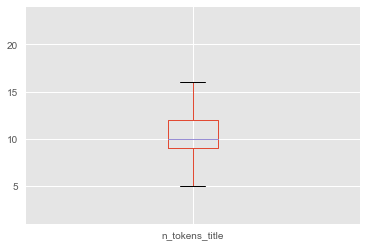

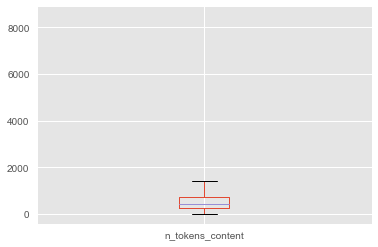

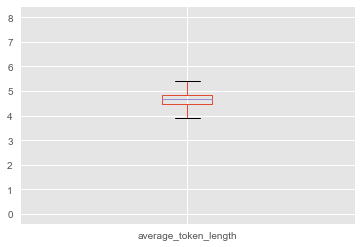

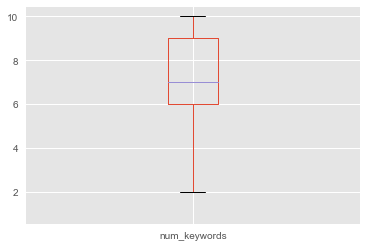

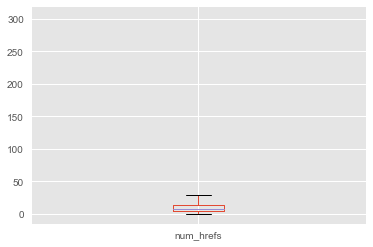

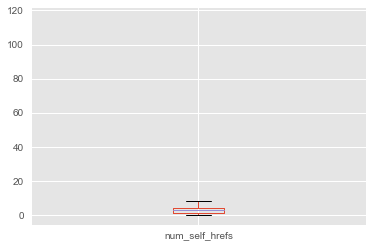

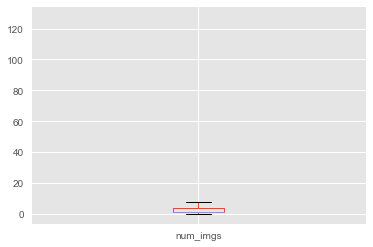

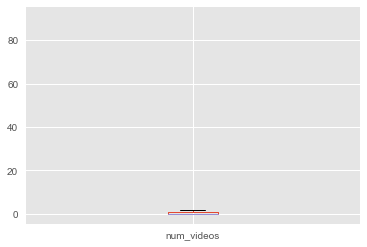

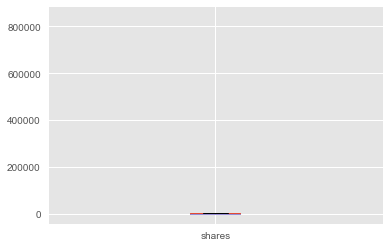

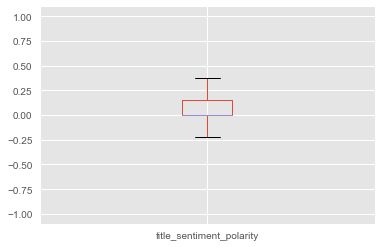

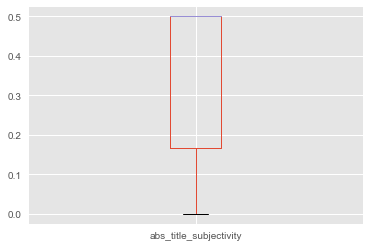

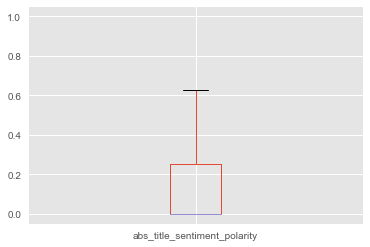

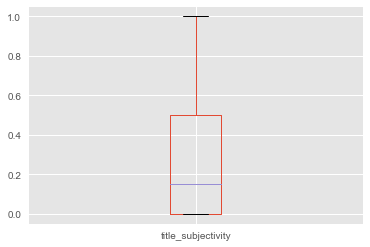

In [164]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline

for var in imp_features:
    df1.boxplot(column=var)
    plt.show()

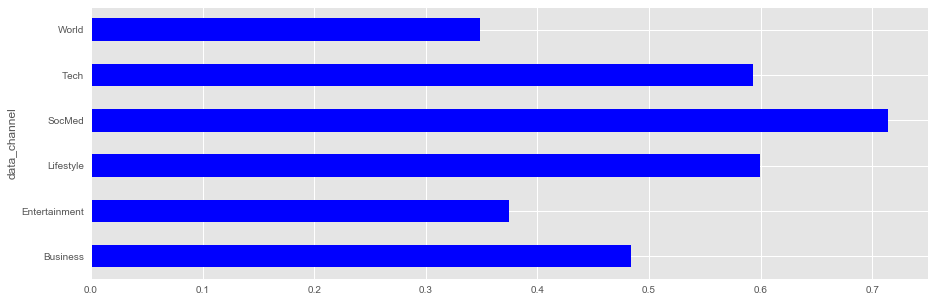

In [148]:
df_channel = copy.deepcopy(df1)
df_channel = df_channel.groupby(by=['data_channel'])
popularity_rate = df_channel.popularity.sum() / df_channel.popularity.count()
popularity_rate.plot(kind='barh', stacked=True, color = ['blue'])

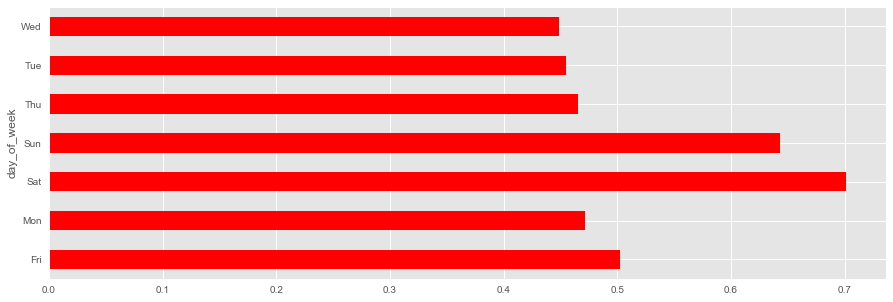

In [151]:
df_day = copy.deepcopy(df1)
df_day = df_day.groupby(by=['day_of_week'])
popularity_rate = df_day.popularity.sum() / df_day.popularity.count()
popularity_rate.plot(kind='barh', stacked=True, color = ['red'])

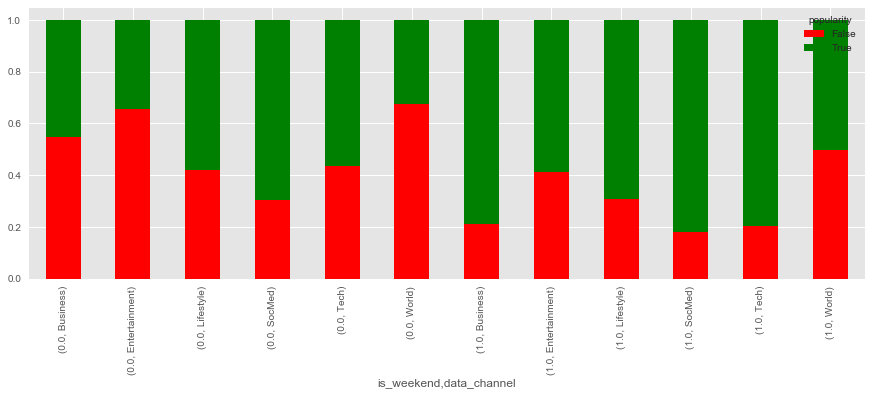

In [161]:
pop_counts = pd.crosstab([df1['is_weekend'],df1['data_channel']], df1.popularity)
pop_rate = pop_counts.div(pop_counts.sum(1).astype(float),axis=0)
pop_rate.plot(kind='bar', stacked=True, color=['red','green'])

In [152]:

df1['popularity'] = np.where(df1['shares']>1400, True, False)
df = df1
df = df.drop(['shares', 'publish_date', 'title', 'data_channel', 'day_of_week', 'weekday_is_monday',
              'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
              'weekday_is_saturday','weekday_is_sunday','year', 'month', 'day'], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 38 columns):
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null float64
data_channel_is_world            39644 non-null float64
self_reference_min_shares        39644 non-null float64
self_reference_max_shares        39644 non-null flo

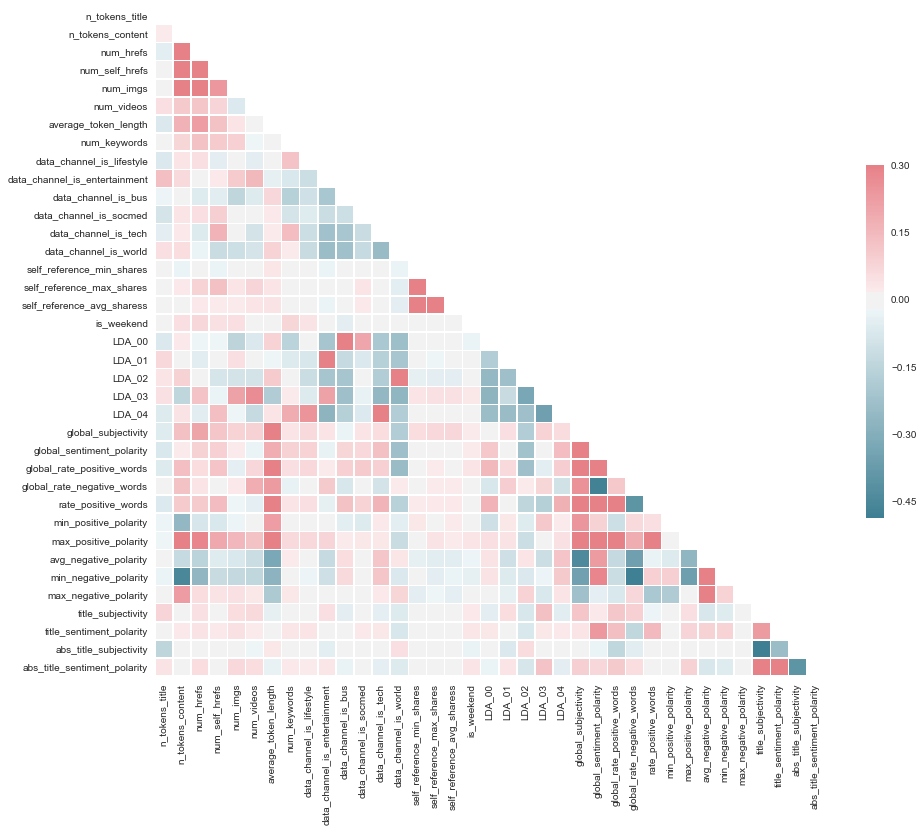

In [165]:
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [153]:
from sklearn.model_selection import ShuffleSplit

if 'popularity' in df:
    y = df['popularity'].values
    del df['popularity']
    X = df.values
    
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                        test_size = 0.2)

print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [154]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

model = LogisticRegression()

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    model.fit(X_train, y_train)  # train object
    y_hat = model.predict(X_test) # get test set precitions
    print("====Iteration",iter_num," ====")
    print("accuracy", acc(y_test, y_hat) )
    print("confusion matrix\n", conf(y_test, y_hat))
    iter_num+=1
    

====Iteration 0  ====
accuracy 0.629461470551
confusion matrix
 [[2725 1368]
 [1570 2266]]
====Iteration 1  ====
accuracy 0.635641316686
confusion matrix
 [[2552 1474]
 [1415 2488]]
====Iteration 2  ====
accuracy 0.631605498802
confusion matrix
 [[2517 1578]
 [1343 2491]]


In [155]:
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test)

lr_clf = LogisticRegression(penalty='l2', C=0.05)
lr_clf.fit(X_train_scaled, y_train)

y_het = lr_clf.predict(X_test_scaled)

zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out
    

data_channel_is_entertainment has weight of -0.290143671086
data_channel_is_bus has weight of -0.242742654513
LDA_02 has weight of -0.230743969469
data_channel_is_world has weight of -0.1829579089
average_token_length has weight of -0.153396050491
num_self_hrefs has weight of -0.112092346306
data_channel_is_lifestyle has weight of -0.0677415735857
LDA_01 has weight of -0.0626285104053
min_positive_polarity has weight of -0.0452600456897
global_rate_positive_words has weight of -0.0357697005364
max_positive_polarity has weight of -0.0236800355965
LDA_03 has weight of -0.0182808563087
n_tokens_title has weight of -0.015273654241
global_sentiment_polarity has weight of -0.0125298842964
avg_negative_polarity has weight of -0.000235941961297
abs_title_sentiment_polarity has weight of 0.000820623209208
max_negative_polarity has weight of 0.00831206702687
min_negative_polarity has weight of 0.0128195224846
global_rate_negative_words has weight of 0.0128790781424
LDA_04 has weight of 0.0155385

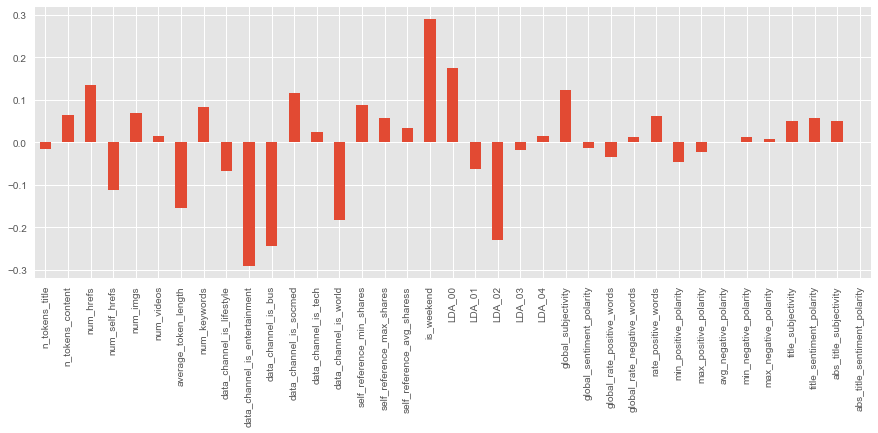

In [156]:
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0], index = df.columns)
weights.plot(kind = 'bar')
plt.show()